## Diabetes

### Descripción del dataset

Este conjunto de datos proviene del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene diabetes o no, basándose en ciertas mediciones de diagnóstico incluidas en el conjunto de datos. El dataset puede encontrarse en [este](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) enlace.

### ¿Qué es la diabetes?

La diabetes es una enfermedad metabólica crónica que se caracteriza por los niveles elevados de glucosa en la sangre (o azúcar en la sangre). La más común es la diabetes de tipo 2 que sucede cuando el cuerpo se vuelve resistente a la insulina o no produce suficiente insulina. En la diabetes tipo 1 el páncreas produce poca o ninguna insulina por sí sólo. (World Health Organization: WHO, 2019).

También existe la diabetes gestacional, esta se desarrolla durante el embarazo. Para la mayoría de mujeres, los niveles de glucosa en sangre vuelven a la normalidad después del nacimiento del bebé. Pero sí se desarrolla, se tiene un mayor riesgo de desarrollar diabetes de Tipo 2, por lo que es necesario hacerse revisiones regularmente.  (American Diabetes Association, s.f.)

### ¿Qué es la insulina?

La insulina es una hormona con diferentes funciones, pero la más importante es nivelar los niveles de glucosa. Cuando commemos, los niveles de glucosa en sangre incrementan, una parte del azúcar llega a las células beta del páncreas, dónde promueve la liberación de insulina. Comer mal o factores genéticos puede hacer que se desarrolle resistencia a la insulina, esto produce que ciertos tejidos no sean capaces de absorber glucosa porque no responden bien a la hormona. Cuando aumenta la glucosa las células beta producen una cantidad excesiva de insulina (hiperinsulinemia) lo que ocasiona que las células beta se desgasten y disminuyan la producción de insulina. Cuando el cuerpo no produce la insulina necesaria, la glucosa se pega a las diferentes proteínas del cuerpo, lo que provoca daños en distintas partes del cuerpo. (Santos Anastacio & Aceves Fonseca, 2018)


### Información presente en el Dataset

En el dataset se aplicaron restricciones para la elección de las observaciones, el sujeto es femenino y debe tener al menos 21 años de edad en el momento que se tomó la evalución. Sólo se seleccionó un exámen por sujeto. El exámen seleccionado fue uno que reveló un GTT no diabético y cumplió con uno de los dos criterios siguientes:

* La diabetes fue diagnosticada dentro de los cinco años posteriores al exámen
* Un GTT realizado cinco o más años después no logró revelar diabetes mellitus.

Si la diabetes ocurrió dentro de un año de un examen, se excluye del estudio para eliminar del modelo de pronóstico aquellos casos que potencialmente eran más fácil de pronosticar. En el 75% de los exámenes excluidos, la DM fue diagnosticada a los seis meses. (Smith, J.W et al, 1988)

Las columnas del dataset representan los siguientes datos.

* Pregnancies: El número de veces que la persona ha estado embarazada.
* Glucose:  Concentración de Glucosa en el Plasma a dos horas de realizado un test oral de tolerancia de glucosa (GTT) por sus siglas en inglés.
* Diastolic blood pressure (mm Hg): Presión arterial diastólica.
* Triceps Skin Fold Thickness (mm): Grosor del pliegue cutáneo del tríceps (mm)
* 2-Hour Serum Insulin ($\mu$ U/ml) : Insulina sérica de 2 horas ($\mu$ U/ml)
* Body Mass Index (Weight in kg / (Height in m)<sup>2</sup>)
* Diabetes Pedigree Function: Función del pedigrí de la diabetes
* Age (years): Edad en años
* Outcome: Resultado, 0 es negativo, 1 es positivo. 

---

- Nota: La función (DPF) sirve para proporcionar una síntesis de la historia de la diabetes mellitus en parientes y la relación genética de esos parientes con el sujeto. El DPF utiliza información de padres, abuelos, hermanos y medios hermanos, tíos y tías y medios típs y tías, así cómo de primos. Proporciona una medida de la influencia genética esperada de familiares afectados y no afectados sobre la eventual diabetes del sujeto. (Smith, J.W et al, 1988)




### Análisis del  dataset
#### Cargamos el dataset utilizando la biblioteca de Pandas

In [7]:
import pandas as pd

data_set_diabetes = pd.read_csv("./Datasets/diabetes.csv")

Revisamos si se tienen valores nulos

In [11]:
data_set_diabetes.isna().sum().sum()

0

Contamos cuantos valores son cero para cada columna, como se puede observar en el output, hay 111 filas de Pregnancies con un dato de **0**, 5 filas con el dato Glucose en **0**, 35 de BloodPressure en **0**, 227 de SkinThickness en **0**, 374 de Insulin en **0** y 11 de BMI en **0**.

El Age no hay ningún dato que sea 0 puesto que solo se tomaron ejemplos donde la persona tuviera por lo menos 21 años de edad.

En el caso de la DPF tampoco se tienen valores en 0.

El Outcome en realidad va a salir alto puesto que su valor es de 0 o 1, no es relevante en este caso.

Sin embargo, los demás datos que están en cero pueden complicar el entrenamiento del modelo generando ruido, por lo que deben de tratarse.

In [12]:
zero_counts = (data_set_diabetes == 0).sum()

print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Como se aprecia a continuación, la cantidad de ejemplos con diabetes es de 268 y la cantidad de ejemplos sin diabetes es de 500.

Esto quiere decir que nuestro set de datos en este caso es **imbalanceado**

In [16]:
data_set_diabetes.value_counts('Outcome')

Outcome
0    500
1    268
Name: count, dtype: int64

Utilizando la función describe se puede observar que el valor mínimo para la mayoría de columnas es de 0, como ya se vio anteriormente, hay filas que tienen ceros en distintas columnas, lo que se puede observar aquí también.

Las únicas dos variables donde el valor mínimo es distinto de cero son el DPF con un mínimo de **0.078000** y el Age con un mínimo de **21**

In [17]:
data_set_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Podemos hacer un gráfico de histogramas para ver la distribución del dataset entero con los ceros incluidos

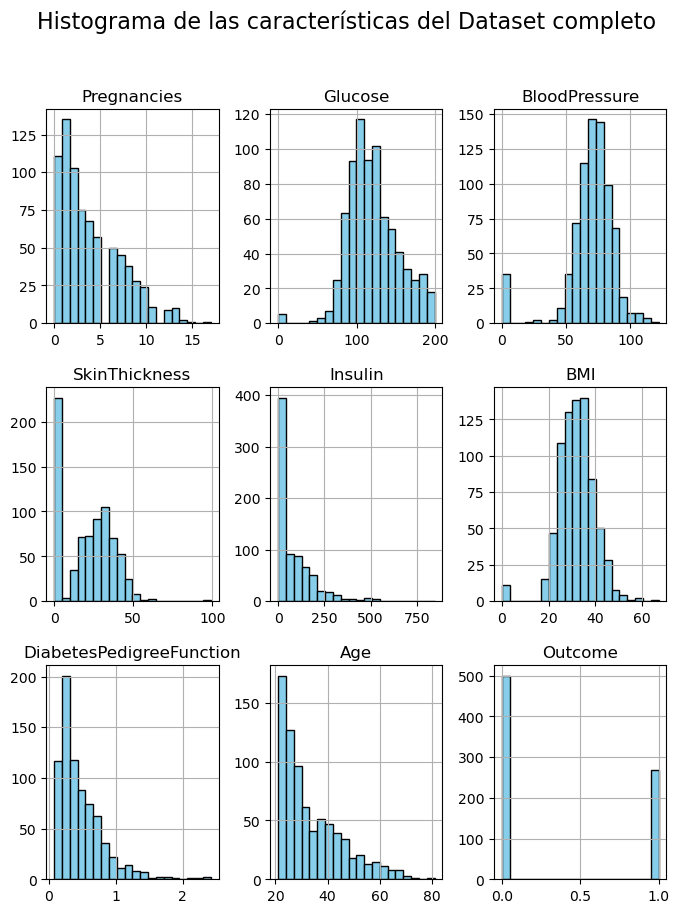

In [23]:

import matplotlib.pyplot as plt
import seaborn as sns
data_set_diabetes.hist(bins=20, figsize=(8, 10), layout=(3, 3), color='skyblue', edgecolor='black')
plt.suptitle('Histograma de las características del Dataset completo', fontsize=16)
plt.show()

Nota: Puede ser que se relacione el número de embarazos con el resultado del test de glucosa a las 2 horas, porque? Porque si la persona desarrollo diabetes gestacional, entonces es más probable que desarrolle diabetes de tipo 2.

### Bibliografía

World Health Organization: WHO. (2019, Mayo 13). Diabetes. https://www.who.int/health-topics/diabetes?gad_source=1&gclid=CjwKCAjwlbu2BhA3EiwA3yXyu8P93rLctxz0dWaQagqlwSQjyE4EYIqKVmVn1FlIyWSvT6At9y5imhoCDyAQAvD_BwE#tab=tab_1

Santos Anastacio, S. A. B., & Aceves Fonseca, A. F. E. (2018, Mayo 4). Diabetes: relación tormentosa entre glucosa e insulina. Centro De Ciencias De La Complejidad. https://www.c3.unam.mx/noticias/noticia28.html

American Diabetes Association. (s.f.). La glucosa (azúcar) en sangre y la insulina en acción. https://diabetes.org/espanol/la-glucosa-y-la-insulina-en-accion

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

## Carros
